# 0. required packages for h5py

In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

31004


# 1. Create field-of-view class

In [17]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH',
             'save_folder':r'D:\Pu_Temp\20190727-IMR90_SI14_DNA-MERFISH',
             'experiment_type': 'DNA',
             'num_threads': 13,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20191005-Corrections_3color_step60_from_30',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'sigma_zxy':[2.5,1.9,1.9],
                     'distance_zxy':[100,108,108],
                     'corr_channels':['750','647', '561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':10,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':50,
                     'max_num_seeds': None,
                     'spot_seeding_th':250,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [35]:
reload(get_img_info)
reload(classes.field_of_view)
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=5,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                              '_color_format':'tsv',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=True,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 80
- Number of field of views: 20
- Importing tsv format color_usage file: \\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\Analysis\Color_Usage.tsv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0B,B', 'H1Q1,Q2,Q3', 'H2Q4,Q5,Q6', 'H3Q7,Q8,Q9', 'H4Q10,Q11,Q12', 'H5Q13,Q14,Q15', 'H6Q16,Q17,Q18', 'H7Q19,Q20,Q21', 'H8Q22,Q23,Q24_rep', 'H9Q25,Q26,Q27', 'H10Q28,Q29,Q30', 'H11Q31,Q32,Q33', 'H12Q34,Q35,Q36', 'H13Q37,Q38,Q39', 'H14Q40,Q41,Q42', 'H15Q43,Q44,Q45', 'H16Q46,Q47,Q48', 'H17Q49,Q50,Q51', 'H18Q52,Q53,Q54', 'H20B,B', 'H58R1,R26', 'H59R2,R27', 'H60R3,R28', 'H61R4,R29', 'H62R5,R30', 'H63R6,R31', 'H64R7,R32', 'H65R8,R33', 'H66R9,R34', 'H67R10,R35', 'H68R11,R36', 'H69R12,R37', 'H70R13,R38', 'H71R14,R39', 'H72R15,R40', 'H73R16,R41', 'H75R17,R42', 'H76R18,R43', 'H77R19,R44', 'H78R20,R45', 'H79R21,R46', 'H80R22,R47', 'H81R23,R48', 'H82R24,R49', 'H83R25,R50', 'H84R51,R76', 'H85R52,R77', 'H8

### 2. Process image into candidate spots

+ load reference image from file:\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_05.dax
- correct the whole fov for image: \\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_05.dax  in 4.645s
-- removing hot pixels for channels:['488'] in 4.791s
-- illumination correction for channels: 488, in 1.853s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 11.787s
-- saving fov_info to file: D:\Pu_Temp\20190727-IMR90_SI14_DNA-MERFISH\Conv_zscan_05.hdf5
++ base attributes saved:[] in 0.223s.
-- choose dapi images from folder: \\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H20B,B.
- correct the whole fov for image: \\10.245.74.212\Chromatin_N

<IPython.core.display.Javascript object>


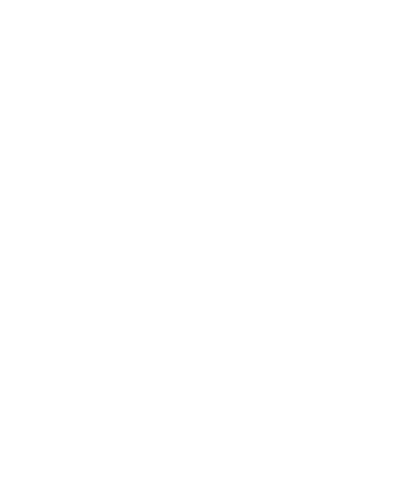

In [36]:
fov.ref_id = 20
fov.ref_filename = os.path.join(fov.annotated_folders[fov.ref_id], fov.fov_name)
# load reference
_ref_im = fov._load_reference_image(_overwrite=False)
# load DAPI
dapi_im = fov._load_dapi_image(_dapi_id=1, _overwrite=False)

visual_tools.imshow_mark_3d_v2([fov.dapi_im, fov._ref_im])

In [37]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

fov.combo_ref_id = 20
fov.parallel=True
overwrite = False

# process image into spots
fov._process_image_to_spots('combo', 
                             _load_common_reference=True,
                             _load_with_multiple=False,
                             _save_images=True,
                             _warp_images=False, 
                             _overwrite_drift=False,
                             _overwrite_image=False,
                             _overwrite_spot=overwrite,
                             _verbose=True)

-- folders not selected, allow processing all 76 folders
+ load reference image from file:\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_05.dax
- correct the whole fov for image: \\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_05.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.212\Chromatin_NAS_2\20190727_IMR90_intron-DNA-MERFISH\H58R1,R26\Conv_zscan_05.dax  in 3.186s
-- removing hot pixels for channels:['488'] in 4.482s
-- illumination correction for channels: 488, in 1.593s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 9.616s
-- saving fov_info to file: D:\Pu_Temp\20190727-IMR90_SI14_DNA-MERFISH\Conv_zscan_05.hdf5
++ base attributes saved:['combo_ref_im'] in 6.231s.
-- checking combo, region:[26  1] in 0.000s.
-- checking combo, region:[27  2] in 0.016s.
-- checking

In [41]:
from ImageAnalysis3.segmentation_tools import cell
reload(cell)
#seg_file = fov.save_filename.replace('.hdf5', '_Segmentation')

<module 'ImageAnalysis3.segmentation_tools.cell' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\segmentation_tools\\cell.py'>

In [42]:
seg_class = cell.Cellpose_Segmentation_Psedu3D(fov.dapi_im, )

In [44]:
seg_label = seg_class.run()

- 14 layers selected with <function mean at 0x000001FE14BF5558> projection.
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 14 image(s)


  0%|                                                                                        | 0/14 [00:00<?, ?it/s]E:\Users\puzheng\anaconda3\lib\site-packages\torch\nn\functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
100%|███████████████████████████████████████████████████████████████████████████████| 14/14 [00:24<00:00,  1.78s/it]


time spent: running network 13.23s; flow+mask computation 11.47
stitching 14 masks using stitch_threshold=0.200 to make 3D masks
estimated masks for 14 image(s) in 28.45 sec
>>>> TOTAL TIME 28.45 sec
- start merging 3d masks
-- overlap found for cell:2 to 25 0.13880445795339413 1.0
--- redo 2
-- overlap found for cell:2 to 35 1.0 0.0967125569545833
--- skip 2
-- overlap found for cell:16 to 50 0.017907478030177417 1.0
--- redo 16
-- overlap found for cell:17 to 56 1.0 0.447216796875
--- skip 17
-- overlap found for cell:19 to 45 1.0 0.3869966240655896
--- skip 19
-- overlap found for cell:24 to 32 1.0 0.0900684063845959
--- skip 24
-- overlap found for cell:32 to 57 0.060172282746389666 1.0
--- redo 32
-- overlap found for cell:33 to 36 0.1317819732798093 1.0
--- redo 33
-- overlap found for cell:37 to 43 1.0 0.15294185777160066
--- skip 37
-- overlap found for cell:38 to 44 1.0 0.07731182273191117
--- skip 38
-- overlap found for cell:39 to 44 1.0 0.03654210603041936
--- skip 39
-- ov

<IPython.core.display.Javascript object>


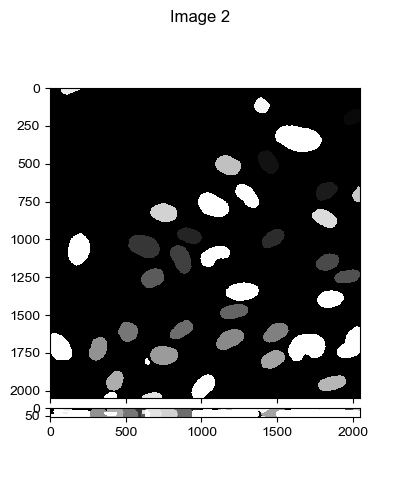

In [45]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, seg_label])

In [8]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:

    fov_id = _f.attrs['fov_id']

    #polyt_im = _f['protein']['ims'][0]
    combo_ims = _f['combo']['ims'][:]
    

In [7]:
fov._load_from_file('combo')

+ loading combo from file: D:\Pu_Temp\20190727-IMR90_SI14_DNA-MERFISH\Conv_zscan_01.hdf5
++ finish loading combo in 0.459s. 


<IPython.core.display.Javascript object>


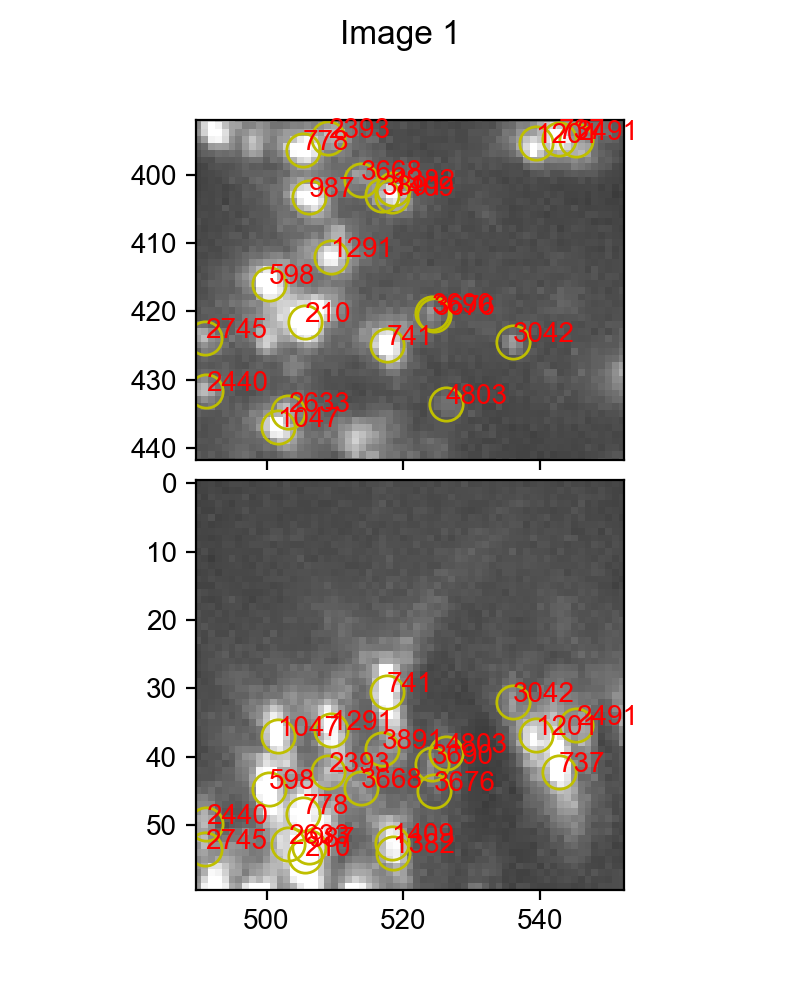

In [9]:
coord_dict = {
    'coords':[],
    'class_ids':[],
}
for _i, _spots in enumerate(fov.combo_spots_list):
    coord_dict['coords'].extend([np.flipud(_spot[1:4]) for _spot in _spots])
    coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32)*_i ) )



im_class = ia.visual_tools.imshow_mark_3d_v2(combo_ims, 
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


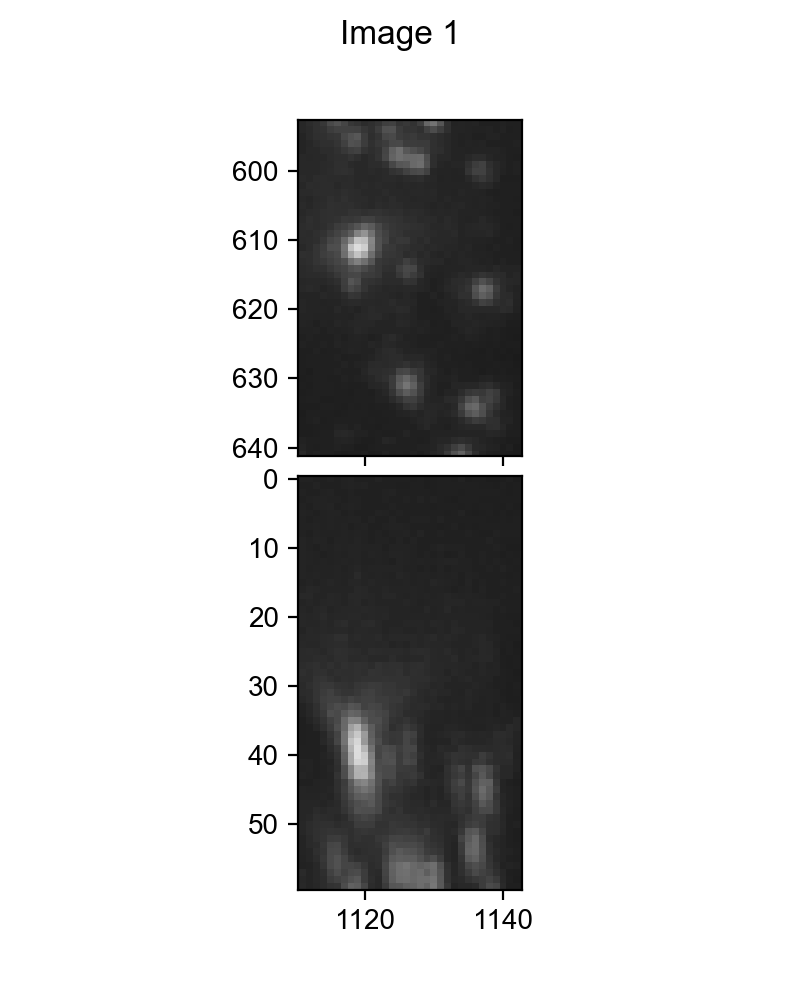

In [29]:
visual_tools.imshow_mark_3d_v2([combo_ims])

# 3. Find chromosomes

## 3.1 load chromosome image

In [6]:
overwrite_chrom = False
chrom_im = fov._load_chromosome_image(_type='reverse', 
                                      _overwrite=overwrite_chrom)

-- choose chrom images from folder: \.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20210320-proB_Dox_IAA_STI_CTP-08_2color\H0R0\Conv_zscan_30.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_35_2048_2048.npy
	 647 None
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20210320-proB_Dox_IAA_STI_CTP-08_2color\H0R0\Conv_zscan_30.dax  in 8.030s
-- removing hot pixels for channels:['647'] in 7.033s
-- illumination correction for channels: 647, in 1.573s
-- warp image with chromatic correction for channels: [] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 38.839s
-- chromosome image has drift: [0. 0. 0.]
-- saving fov_info to file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5
++ base attributes saved:['chrom_im'] in 5.277s.


## 3.2 find candidate chromosomes

In [7]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4,
                                                               _binary_per_th=99.75, 
                                                               _morphology_size=2,
                                                               _overwrite=overwrite_chrom)

+ loading fov_info from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5
++ base attributes loaded:[] in 4.192s.
-- adjust seed image with filter size=4
-- binarize image with threshold: 99.75%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.


E:\Users\puzheng\Documents\ImageAnalysis3\segmentation_tools\chromosome.py:79: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  _seg_label = random_walker(adj_chrom_im, _label, beta=10, mode='cg_mg')


-- find objects larger than size=50
-- 550 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 24 threads in 348.254s.
-- saving fov_info to file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.125s.


## 3.3 select among candidate chromosomes

In [8]:
chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.3,
                                                         _cand_spot_intensity_th=200,
                                                         _save=True, 
                                                         _overwrite=overwrite_chrom)

+ loading fov_info from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5
++ base attributes loaded:[] in 5.189s.
+ loading unique from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


++ finish loading unique in 1.086s. 
- start select from 550 chromosomes with loss threshold=0.3
-- remove chr id 16, percentage of lost rounds:0.312.
-- remove chr id 545, percentage of lost rounds:0.312.
-- 548 chromosomes are kept.
-- saving fov_info to file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5
++ base attributes saved:['chrom_coords'] in 0.078s.


### visualize chromosomes selections

<IPython.core.display.Javascript object>


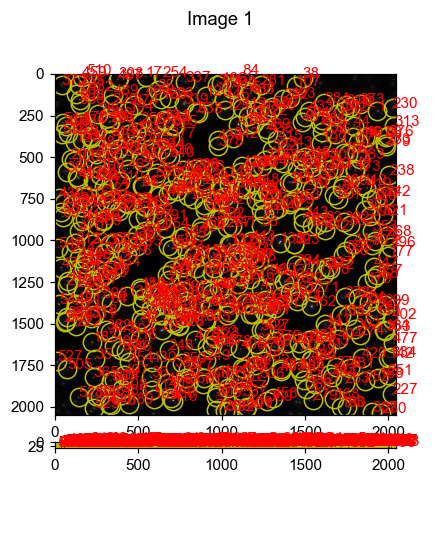

In [9]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


## select spots based on chromosomes

In [5]:
fov._load_from_file('unique')

+ loading unique from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Conv_zscan_30.hdf5
++ finish loading unique in 0.836s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1446: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [6]:
intensity_th = 200
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 549


In [7]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids
dna_reg_channels = fov.unique_channels
chrom_coords = fov.chrom_coords


# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 3000nm
good_chr_th = 0.8 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
    
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

kept chromosomes: 522


### EM pick spots

+ iter:0
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 12.560s
--- collapse all regions into 1d.


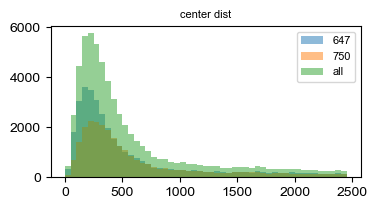

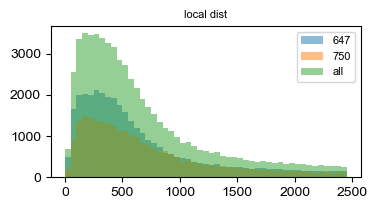

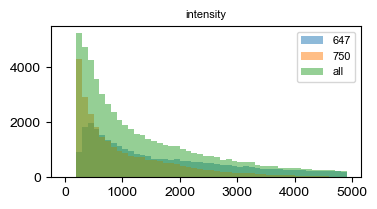

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 10.465s
-- region kept: 0.7910


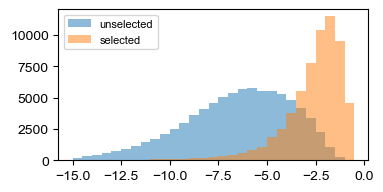

+ iter:1
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 7.206s
--- collapse all regions into 1d.


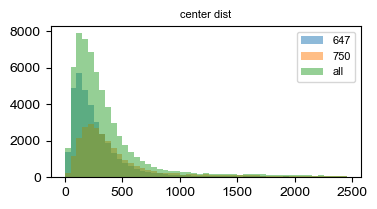

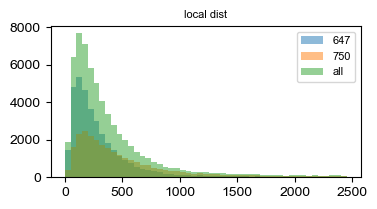

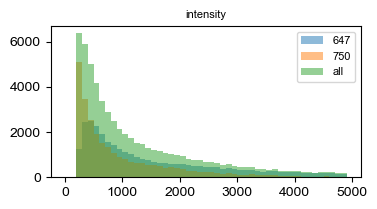

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 10.511s
-- region kept: 0.9584


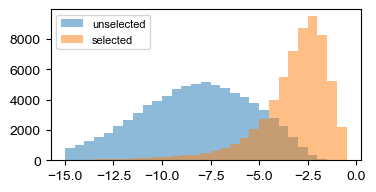

+ iter:2
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 7.179s
--- collapse all regions into 1d.


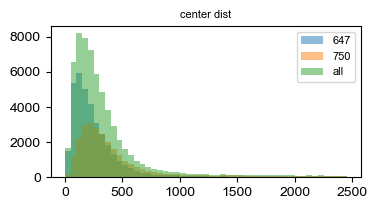

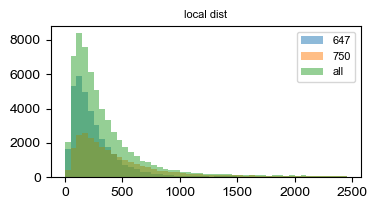

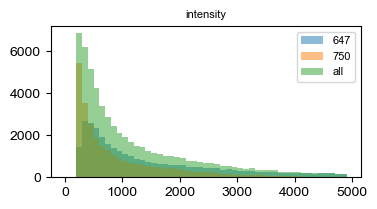

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 10.224s
-- region kept: 0.9903


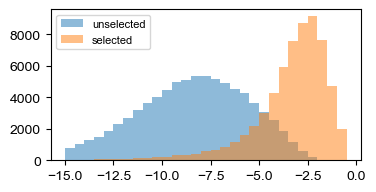

+ iter:3
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 7.198s
--- collapse all regions into 1d.


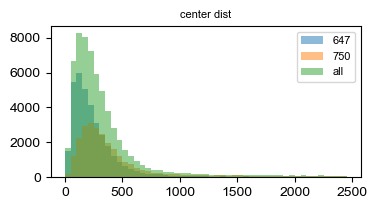

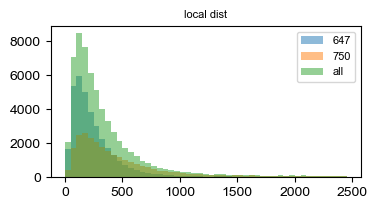

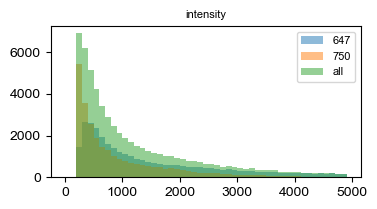

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 10.483s
-- region kept: 0.9966


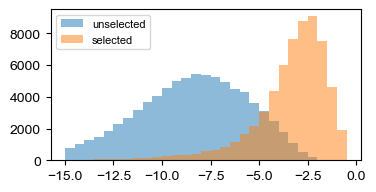

+ iter:4
-- generate reference metrics
--- multiprocessing expectation step with 24 threads, in 7.182s
--- collapse all regions into 1d.


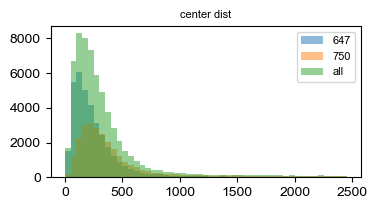

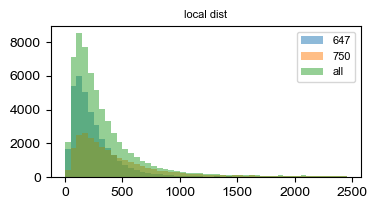

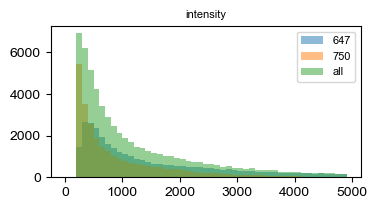

- pick spots by scores
--- multiprocessing maximization step with 24 threads, in 10.552s
-- region kept: 0.9983


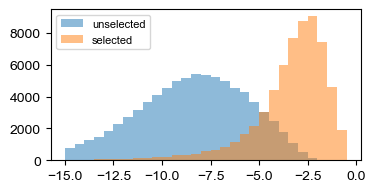

In [13]:
%matplotlib inline
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores, generate_reference_from_population, evaluate_differences

niter= 10
num_threads = 24
ref_chr_cts = None
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list)
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,2500,50), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,2500,50), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), bins=np.arange(0,5000,100), alpha=0.5, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list, other_scores_list = \
    pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, 
        ref_ct_dists=ref_ct_dists, ref_local_dists=ref_local_dists, ref_ints=ref_ints, 
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_intensity_channels=True,
        split_distance_channels=False,
        return_other_scores=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.concatenate([np.concatenate(_scores) 
                       for _scores in other_scores_list]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='unselected')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

In [16]:
%%timeit 
spot_tools.picking.chromosome_center_dists(sel_dna_hzxys_list[0][0], ref_channels=dna_reg_channels, split_channels=False)

1.57 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit 
spot_tools.picking.chromosome_center_dists(sel_dna_hzxys_list[0][0], ref_channels=dna_reg_channels, split_channels=True)

1.78 ms ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -5
int_th = 200
bad_spot_percentage = 1.0 #0.5

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
#kept_chrom_coords = np.array(sel_chrom_coords)[kept_chr_ids]
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

E:\Users\puzheng\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


0.26291021156088623


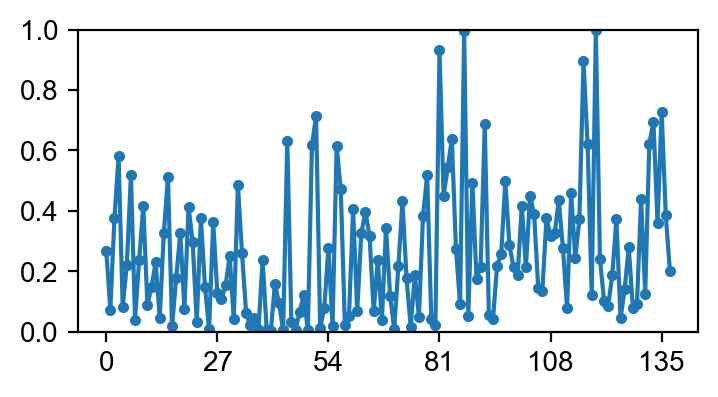

In [11]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_ylim([0,1])
ax.set_xticks(np.arange(0,len(dna_reg_ids),int(len(dna_reg_ids)/5)))
plt.show()

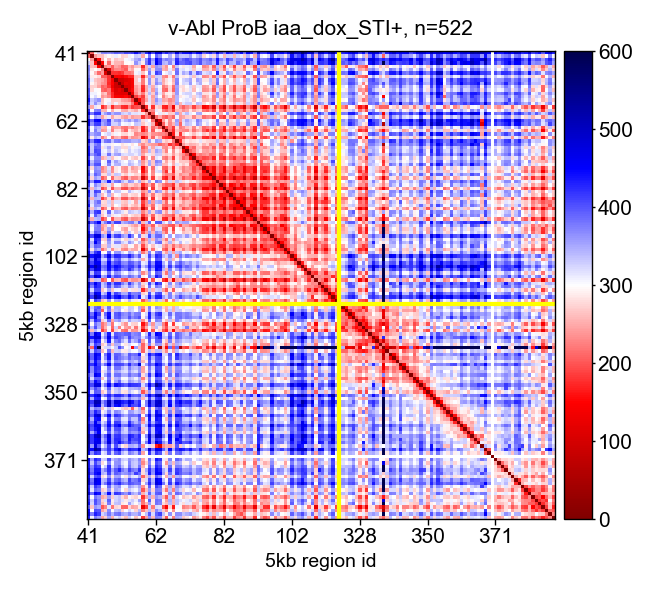

In [12]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'u':
            if int(_info[1:]) in dna_reg_ids:
                imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)
#kept_inds = imaging_order # plot imaging ordered regions

#kept_inds = np.where(loss_rates<0.5)[0] # plot good regions only
kept_inds = np.arange(len(fov.unique_ids)) # plot all

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"v-Abl ProB iaa_dox_STI+, n={len(distmap_list)}", fontsize=7.5)

_ticks = np.arange(0, len(kept_inds), 20)
ax.set_xticks(_ticks)
ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_xlabel(f"5kb region id", fontsize=7, labelpad=2)
ax.set_yticks(_ticks)
ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_ylabel(f"5kb region id", fontsize=7, labelpad=2)


ax.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
ax.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

## visualize single example

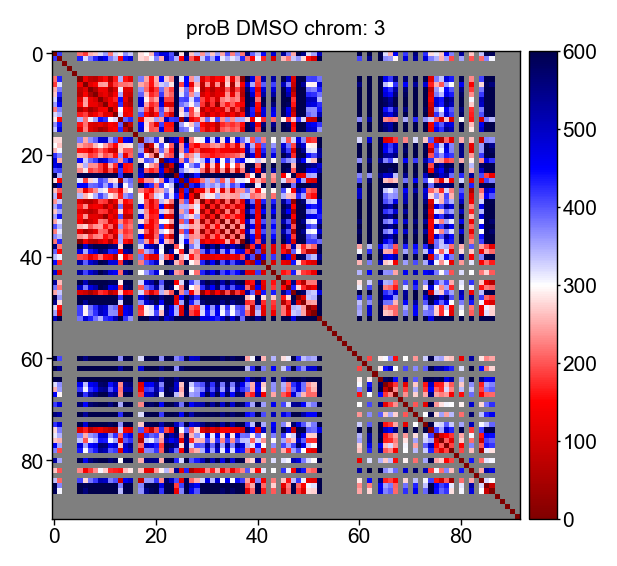

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x000001DE4ED342B0>


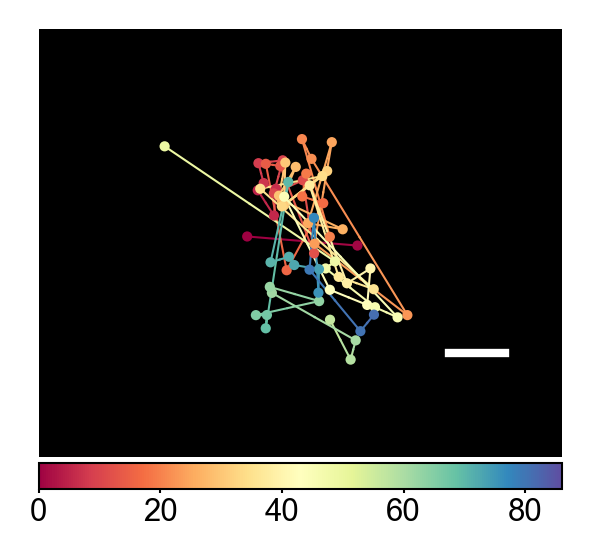

In [131]:
%matplotlib inline


reload(figure_tools.image)

chrom_id = 3

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

#valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,600],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,150,20), 
        figure_dpi=200)
ax.set_title(f"proB DMSO chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0,
        reference_bar_length=200, image_radius=300, 
        line_width=0.5, figure_dpi=300, depthshade=False)
plt.show()

In [132]:
?figure_tools.image.chromosome_structure_3d_rendering

## visualize all fitted spots

In [52]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    raw_spots_list = [_spots[_spots[:,0] > 0] for _spots in _grp['raw_spots'][:]]
    spots_list = [_spots[_spots[:,0] > 0] for _spots in _grp['spots'][:]]

In [53]:
from scipy.spatial.distance import cdist
picked_spot_inds_list = []
for _i, _id in enumerate(dna_reg_ids):
    _cand_hzxys = spots_list[_i][:,1:4] * fov.shared_parameters['distance_zxy']
    _dists = cdist(np.array(final_dna_hzxys_list)[:,_i,1:], _cand_hzxys)#, axis=1
    _matched_spot_inds = []
    for _ds in _dists:
        if np.sum(np.isnan(_ds)) < len(_ds) and np.nanmin(_ds) < 0.01:
            _matched_spot_inds.append(np.argmin(_ds))
        else:
            _matched_spot_inds.append(np.nan)
    # append
    picked_spot_inds_list.append(np.array(_matched_spot_inds))

array([55, 59, 70, 71], dtype=int64)

In [56]:
#vis_inds = [0,1,2,3,4,5]
vis_inds = np.where(loss_rates > 0.8)[0]
vis_ims, vis_ids, vis_spot_list, vis_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_inds:
        vis_ims.append(_grp['ims'][_ind])
        vis_ids.append(_grp['ids'][_ind])
        _picked_inds = picked_spot_inds_list[_ind]
        _picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        vis_spot_list.append(raw_spots_list[_ind][_picked_inds])

In [68]:
dna_reg_ids[59]

335

In [66]:
fov.color_dic

{'H0R0': ['', 'reverse_chrom', 'beads', 'DAPI'],
 'H1R1': ['u41', 'u42', 'beads'],
 'H2R2': ['u44', 'u45', 'beads'],
 'H3R3': ['u47', 'u48', 'beads'],
 'H4R4': ['u50', 'u51', 'beads'],
 'H5R5': ['u53', 'u54', 'beads'],
 'H6R6': ['u56', 'u57', 'beads'],
 'H7R7': ['u60', 'u61', 'beads'],
 'H8R8': ['u63', 'u64', 'beads'],
 'H9R9': ['u66', 'u67', 'beads'],
 'H10R10': ['u69', 'u70', 'beads'],
 'H11R11': ['u72', 'u73', 'beads'],
 'H12R12': ['u75', 'u76', 'beads'],
 'H13R13': ['u78', 'u79', 'beads'],
 'H14R14': ['u81', 'u82', 'beads'],
 'H15R15': ['u84', 'u85', 'beads'],
 'H16R16': ['u87', 'u88', 'beads'],
 'H17R17': ['u90', 'u91', 'beads'],
 'H18R18': ['u93', 'u94', 'beads'],
 'H19R19': ['u96', 'u97', 'beads'],
 'H20R20': ['u99', 'u100', 'beads'],
 'H21R21': ['u102', 'u103', 'beads'],
 'H22R22': ['u105', 'u106', 'beads'],
 'H23R23': ['u108', 'u109', 'beads'],
 'H24R24': ['u111', 'u112', 'beads'],
 'H25R25': ['u114', 'u115', 'beads'],
 'H26R26': ['u323', 'u321', 'beads'],
 'H27R27': ['u326', 

<IPython.core.display.Javascript object>


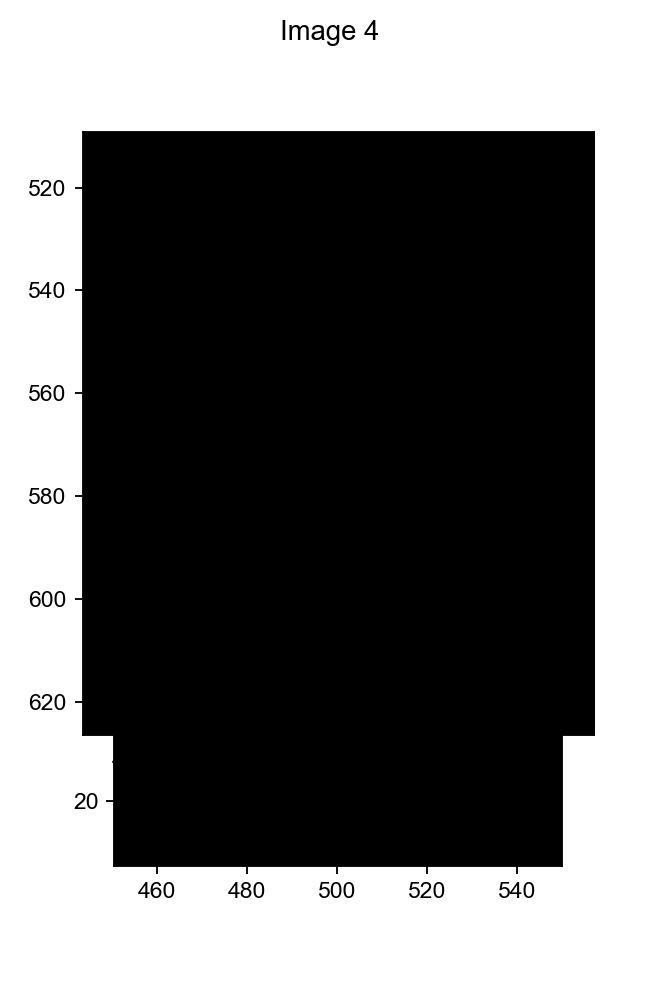

In [64]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_spot_list):
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_spots),dtype=np.int))

fig=plt.figure(figsize=(4,6), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )